In [1]:
import gym
from RL_brain import DeepQNetwork
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from gym import wrappers

In [2]:
env = gym.make('CartPole-v0')
env = env.unwrapped
env.reset()

print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [3]:
def show_state(env, step=0, episode=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("Episode = %d, Step= %d" % (episode, step))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

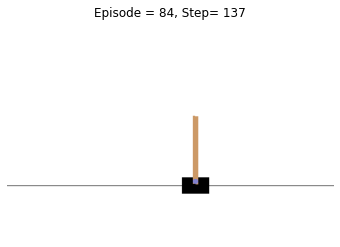

In [ ]:
RL = DeepQNetwork(n_actions=env.action_space.n,
                  n_features=env.observation_space.shape[0],
                  learning_rate=0.01, e_greedy=0.9,
                  replace_target_iter=100, memory_size=2000,
                  e_greedy_increment=0.001,)

total_steps = 0


for i_episode in range(100):

    observation = env.reset()
    ep_r = 0
    steps = 0
    while True:
        show_state(env, steps, i_episode)

        action = RL.choose_action(observation)

        observation_, reward, done, info = env.step(action)

        # the smaller theta and closer to center the better
        x, x_dot, theta, theta_dot = observation_
        r1 = (env.x_threshold - abs(x))/env.x_threshold - 0.8
        r2 = (env.theta_threshold_radians - abs(theta))/env.theta_threshold_radians - 0.5
        reward = r1 + r2

        RL.store_transition(observation, action, reward, observation_)

        ep_r += reward
        if total_steps > 1000:
            RL.learn()

        if done:
            print('episode: ', i_episode,
                  'ep_r: ', round(ep_r, 2),
                  ' epsilon: ', round(RL.epsilon, 2))
            break

        observation = observation_
        total_steps += 1
        steps += 1

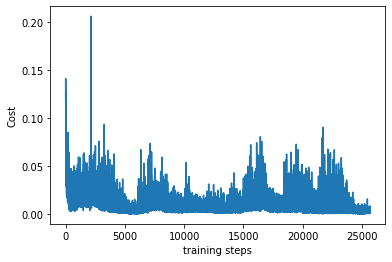

In [5]:
RL.plot_cost()